# Some Tests with Hash Functions

In [2]:
from binascii import hexlify
from os import urandom
from hashlib import sha256, shake_128
import numpy as np
import matplotlib.pyplot as plt

# Example 1

Let's hash an ASCII string with SHA256. Print the output will as a hexadecimal string

In [3]:
x = b"test message"
y = sha256(x).hexdigest()
y

'3f0a377ba0a4a460ecb616f6507ce0d8cfa3e704025d4fda3ed0c5ca05468728'

# Example 2

Consider the hash SHAKE128 with output 16 bits. Generate a random digest and find a preimage. Print the number of attempts.

In [9]:
DIGESTSIZE = 2

# Define a hash function h with output size DIGESTSIZE bytes 
h = lambda x: shake_128(x).digest(DIGESTSIZE)

# y is the target
y = urandom(DIGESTSIZE)

i = 1
while True:
    # Generate a random 64 bit input
    xp = urandom(8)
    yp = h(xp)
    if (yp == y):
        print("Attempt #{}".format(i) )
        print("Preimage is {}".format(hexlify(xp)) )
        break
    i = i + 1

Attempt #75328
Preimage is b'6bf746f446459de6'


# Example 3

Find, empirically, the average number of attempts to find a preimage to SHAKE128 with output 8 bits

In [10]:
DIGESTSIZE = 1
h = lambda x: shake_128(x).digest(DIGESTSIZE)

def simulate():
    i = 1
    while True:
        y = urandom(DIGESTSIZE)
        # Generate a random 64 bit input
        xp = urandom(8)
        yp = h(xp)
        if (yp == y):
            return(i)
        i = i + 1

simulations = [simulate() for i in range(1000)]

np.mean(simulations)

259.964

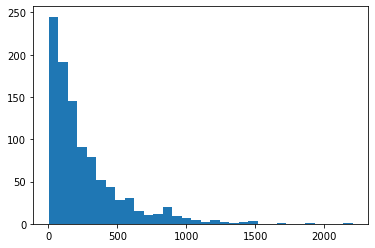

In [11]:
plt.hist(simulations,32);

# Example 4

Find the empirical probability of finding a second preimage with $q=100$ attempts  

In [13]:
DIGESTSIZE = 1
# attempts
q = 100
# number of simulations
num_simulations = 10000

h = lambda x: shake_128(x).digest(DIGESTSIZE)

def simulate(message,attempts):
    y = h(message)
    for i in range(attempts):
        xp = urandom(8)
        yp = h(xp)
        if (yp == y):
            return(1)
    return(0)

# generate many random messages
messages = [urandom(8) for i in range(num_simulations)]

# simulate finding a second preimage
simulations = [ simulate(m,q) for m in messages]

# result
p_succ = (sum(simulations)) / num_simulations
p_theory = q / 2**8

print("Simulations: p={}".format(p_succ))
print("Theory: p={}".format(p_theory))

Simulations: p=0.3304
Theory: p=0.390625


# Example 5

Find the empirical probability of finding a collision with  q=30  attempts.
Use a 16-bit hash function

In [17]:
DIGESTSIZE = 2
# attempts
q = 30
# number of simulations
num_simulations = 10000

h = lambda x: shake_128(x).digest(DIGESTSIZE)

def simulate(attempts):
    calculated_hashes = set()
    for i in range(attempts):
        xp = urandom(8)
        yp = h(xp)
        if (yp in calculated_hashes):
            return(1)
        calculated_hashes.add(yp)
    return(0)

# simulate finding a collision
simulations = [ simulate(q) for i in range(num_simulations)]
# result
p_succ = (sum(simulations)) / num_simulations
p_theory = 1-np.exp(-q**2 / 2**(DIGESTSIZE*8+1))

print("Simulations: p={}".format(p_succ))
print("Theory: p={}".format(p_theory))

Simulations: p=0.0064
Theory: p=0.006842934839798032


# Lab Work
Plot the histogram of the number of attempts to find a collision to SHAKE128 with output 16 bits